# Homework 05 : Sayali Mohite

The purpose of this assignment is to get practice with interactivity using the ipywidgets interface and to think carefully about how our data (and its types) can effect our design choices.

You can use "ipywidgets.interact" or if you want more practice, place construct your widgets.
1. Using traitlets and/or widgets build a notebook that:

. Allows the user to change the x and y fields on a scatter plot from the UFO dataset.  Here the "fields" are the names of the columns in the dataset.  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column in for each of x and y.  Note: you don't have to support both axis having a categorical variable (unless you really want to!).

. Allows the user to pick their colormap.  In class we used the log of the duration in seconds as our color scaling, you can use this or something else (or if you *really* want to get fancy you can let the user decide by using a widget!)

2. Build a second widget that displays binned, aggregate values of a column where you can change:
. The field to "bin".  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column.

. For numerical variables: The number of bins.

In [158]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import matplotlib.colors as mpl_colors


### Loading the UFO_dataset with 

In [159]:
# So, we can apply these ideas to 2D datasets as well
# lets use a different dataset:
ufos = pd.read_csv("C:\\Users\\12172\\Desktop\\Data Visulization\\Assignment 05\\ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country","shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

# you might get a memory warning thing, its just not deprecated correctly
#  try not to panic :D


### Replacing null values within the select columns

In [160]:
ufos = ufos.fillna({'country':'unknown', 'state': 'unknown', 'shape':'unknown'})
ufos.isna().values.sum()

15

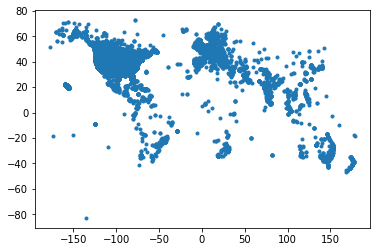

In [161]:
plt.plot(ufos['longitude'],ufos['latitude'],'.')

### Lets down sample to 1000 samples:

In [162]:
nsamples = 1000
#nsamples = 5000
downSampleMask = np.random.choice(range(len(ufos)-1), nsamples, replace=False)
downSampleMask # take a look

array([23465, 70339, 57744, 51811,   113, 19586, 75052, 59158, 58842,
       56026, 24300,  1574, 25200, 54099, 21520, 74241, 13788, 64402,
        7008, 57954,  5667, 22415,  4408, 54560, 31055, 73645, 61055,
       27373, 71421, 65244, 25892, 15450, 58350, 18027, 52294, 17946,
        5524, 73280, 22417, 15257, 34894, 74952,  2590, 38367, 54345,
       18042, 11044, 50467, 65414, 63803,  1090, 64046, 39406, 64618,
        4214, 49568, 13793, 64444, 34580, 48942, 47089, 19214, 47703,
       48320, 64763, 57640, 14150, 52921,  9653,  6723, 78851, 42353,
       61037, 35031, 22000,  3913, 10707, 50960, 56258, 78207, 77688,
       35706,   953, 58711, 43095, 76735, 61473, 26978, 42865, 14810,
       48917, 20278, 43092, 37340, 40726, 61018, 33003, 32019, 28210,
       70295, 36822, 14993, 27980, 44071, 24128, 12017, 17412, 36665,
       50425,  3374, 45678, 49945, 59502, 18464, 69827, 68946,  9255,
       48627,    62, 61775, 41138, 22405, 70099, 17884, 17777, 60944,
       73942, 39641,

In [163]:
ufosDS = ufos.loc[downSampleMask]

In [164]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
23465,2002-12-08 20:45:00,bellingham,wa,us,other,600.0,5-10 min,The Sound..was incrediable&#44the dogs went cr...,2002-12-23,48.759722,-122.486944
70339,2013-08-28 10:35:00,munising,mi,us,other,2.0,seconds,Square shaped UFO going over Lake Superior.,2013-08-30,46.411111,-86.647778
57744,1998-07-18 10:07:00,longmont,co,us,triangle,300.0,3 to 5 minutes,Traingle craft about 60+ feet in diameter was ...,1998-11-21,40.167222,-105.101389
51811,2012-06-25 00:30:00,north cove,nc,us,oval,10.0,10 seconds,Roundish silver object traveling high rate of ...,2012-08-05,35.835833,-81.989167
113,2002-10-10 06:00:00,seattle,wa,us,sphere,90.0,90 seconds,Light falls from sky,2002-10-15,47.606389,-122.330833
...,...,...,...,...,...,...,...,...,...,...,...
33480,2007-03-25 22:18:00,kingston (canada),on,ca,other,30.0,30 seconds,Observed in Kingston On. Canada&#44 2 grey lin...,2007-04-27,44.233333,-76.483333
20008,2004-12-23 00:00:00,chatsworth,ga,us,diamond,60.0,1 minute,i came out an looked cuze of my dogs noise and...,2005-01-11,34.765833,-84.770000
19570,2002-12-02 05:00:00,wiconisco,pa,us,circle,3.0,3 seconds,A blue round light that had a blue tail and mo...,2002-12-23,40.573333,-76.691667
26267,2008-02-13 20:30:00,las vegas,nv,us,cigar,360.0,5-6 mins,Object seen 2/13/2007,2008-03-04,36.175000,-115.136389


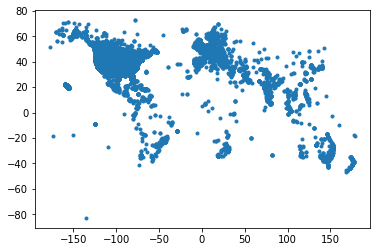

In [165]:
## full data 

plt.clf() # might need this to "get rid" of Michigan data
plt.plot(ufos['longitude'],ufos['latitude'],'.')
plt.show()

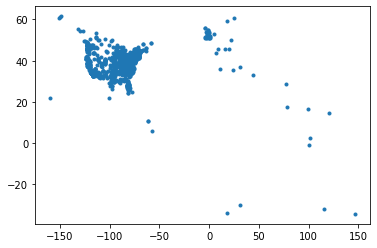

In [166]:
## downsampled data
plt.clf() # might need this to "get rid" of Michigan data
plt.plot(ufosDS['longitude'],ufosDS['latitude'],'.')
plt.show()

In [167]:
#@ipywidgets.interact(style = plt.style.available)

### Part1: Using traitlets and/or widgets build a notebook that:

1. Allows the user to change the x and y fields on a scatter plot from the UFO dataset.  Here the "fields" are the names of the columns in the dataset.  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column in for each of x and y.  Note: you don't have to support both axis having a categorical variable (unless you really want to!).
2. Allows the user to pick their colormap.  In class we used the log of the duration in seconds as our color scaling, you can use this or something else (or if you *really* want to get fancy you can let the user decide by using a widget!)

In [168]:
ufosDS.columns  ## take a look at column names 

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [169]:
plt.clf() # might need this to "get rid" of Michigan data

##filter out the unwanted columns

filter_out =['city', 'comment','duration']
x_select = []
y_select = []

for e in (ufosDS.columns):
    if e not in filter_out:
        x_select.append(e)
        y_select.append(e)

## interactive plot usig widgets

@ipywidgets.interact(x = x_select, y= y_select, colormap = plt.colormaps(),sym_log = False, color_range = (1.0, 352.0, 1.0))

def plot(x = 'longitude',y = 'latitude', color_range = 352, colormap = 'jet',sym_log = False):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(8,6))
    CAX = ax.scatter(ufosDS[x],ufosDS[y], cmap=colormap, norm = norm, c=np.log10(ufosDS['duration_seconds']))
    CAX.set_clim(-color_range, color_range)
    fig.suptitle('Interactive Scatter Plot: UFO Dataset', fontsize=15)
    plt.colorbar(CAX, extend = 'both')

    plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=7, options=('date', 'state', 'country', 'shape', 'durati…

#### Write up:

The column values such as city, comment, duration are filtered out from the user selection. The city column contains data which cannot be intrepreted / dirty data. The comments columns has textual data/ qulitative data which cannot be visualized against catergorial/ numerical dataset. 
The column duration and duration is filtered out as the data set is not continuous and has lot of unwanted symbols. Though Scatterplots can be used to plot both categorical and numerical data, user need to analyze the data column well to glean meanigful insights. Idelally, user must select or choose one catergorial value with numerical value for better outcomes. 

@ipywidgets.interact() creates the user interface. 
The .colormap() function from matplotlib is pulled through @ipywidgets, allowing users to select their colormap through the widget

.@interact decorator function is used to toggle symmetric log color mapping on and off. Specifying the use of log10 for the series'duration_seconds' ensures the readability of the plot.

### Part 2: Build a second widget that displays binned, aggregate values of a column where you can change:

1.The field to "bin".  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). 
You must support the selection of at least 1 categorical column and at least 1 numerical column.

2.For numerical variables: The number of bins.

In [170]:
a =list(ufosDS.columns)
a.append('Null')
print(a)
#list(np.linspace(0,200,21 , dtype='int'))

['date', 'city', 'state', 'country', 'shape', 'duration_seconds', 'duration', 'comment', 'report_date', 'latitude', 'longitude', 'Null']


In [171]:
plt.clf() # might need this to "get rid" of Michigan data

##filter out the coloumns
filter_out =['city', 'comment', 'duration']
x_select = []
#y_select = []
for e in (ufosDS.columns):
    if e not in irrelevant_options:
        x_select.append(e)
        #y_select.append(e)

@ipywidgets.interact(x_axis = x_select,y_axis = ufosDS.columns,bins=[5,10,20,30],columns=a)

def plot2(bins=10,x_axis='latitude',y_axis=None, bin_color="black"):
    fig, ax = plt.subplots(figsize=(8,6))
    if y_axis:
        plt.bar(ufosDS[x_axis],ufosDS[y_axis])
    else:
        ufosDS.hist(column=x_axis, ax=ax,bins=bins)
    
    
    fig.suptitle('Intercative view of UFO: Histogram', fontsize=23)
    plt.xlabel(x_axis, fontsize=20)
    plt.ylabel("Instances", fontsize=20)
    
    plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='bins', index=1, options=(5, 10, 20, 30), value=10), Dropdown(descr…

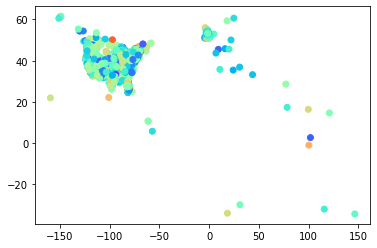

In [172]:
plt.clf()
#visual representation
plt.scatter(ufosDS['longitude'],ufosDS['latitude'], c=np.log10(ufosDS['duration_seconds']), cmap='rainbow')
plt.show()

#### Write up:

1. The irrelevant columns are filtered out such as city, duration, duration_seconds, comment to get some consitency in the data
2. Histogram gives us the distribution of non-discrete variables. It is used to plot the frequency of numerical data.
3. To create the histogram, plt.subplots indicates that multiple plots will be used. With ax.hist the dataframe iterates over columns 
4. Numerical values such as  'duration_seconds', 'latitude', 'longitude' are used for analysis in histogram bins
5. The user have liberty to vary the bin values to plot the histogram graph with numerical values.
6. For example, the x_axis has latitude difference with smaller bin values as compared to larger bin vlaues.
7. we need to consider the bar graph as histogram takes only 1 column , for 2 columns.
8. With bar graph we can plot catergorical values, for instance,city vs latitude changes the values of latitude along with different cities 
9. Calling @ipywidgets.interact creates the user interface. The new values created for bin count and bin color call on the parameters

